<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Labels
Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.2975 - loss: 1.9235 - val_accuracy: 0.3843 - val_loss: 1.7747
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.4542 - loss: 1.5073 - val_accuracy: 0.5370 - val_loss: 1.3155
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.5150 - loss: 1.3638 - val_accuracy: 0.5625 - val_loss: 1.2551
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.5462 - loss: 1.2819 - val_accuracy: 0.6432 - val_loss: 1.0041
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.5685 - loss: 1.2107 - val_accuracy: 0.5887 - val_loss: 1.1462
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.5888 - loss: 1.1674 - val_accuracy: 0.5436 - val_loss: 1.3808
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.6087 - loss: 1.1191 - val_accuracy: 0.6377 - val_loss: 1.0381
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.6251 - loss: 1.0810 - val_accurac

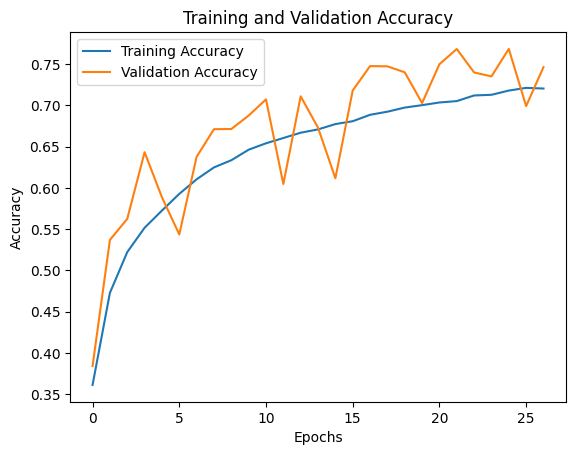

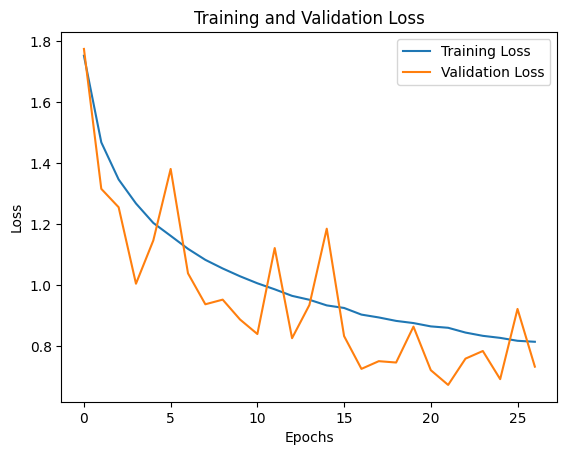

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',           # Monitor the validation loss
    patience=5,                   # Number of epochs with no improvement after which training will be stopped
    verbose=1,                    # Display progress information when early stopping is triggered
    mode='min',                   # Stop when the monitored value stops decreasing
    restore_best_weights=True    # Restore the weights of the best model when training stops
)

# Load the CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

# Normalize pixel values to 0-1 range
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill missing pixels after transformation
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers before the fully connected layers
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Increased dropout rate

model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Increased dropout rate

model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Using categorical loss for multi-class classification
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # Use data augmentation during training
    epochs=50,  # Increased epochs
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping]  # Include early stopping callback
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [20]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train)

# Display the results
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7928 - loss: 0.5981
Train Loss: 0.6024
Train Accuracy: 78.92%


In [21]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# Display the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7681 - loss: 0.6732
Test Loss: 0.6719
Test Accuracy: 76.82%


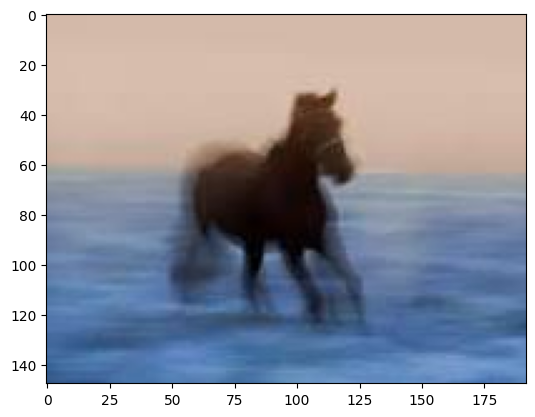

In [22]:
#Predict
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/download.jpeg")
plt.imshow(img)


In [23]:
img.shape

(148, 192, 3)

In [24]:
#resize the image
img=cv2.resize(img,(32,32))
img.shape

(32, 32, 3)

In [25]:
import numpy as np

# CIFAR-10 class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the class
prediction = model.predict(img.reshape(1, 32, 32, 3))

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Loop through each class and print if it matches the predicted class
for i in range(10):
    if predicted_class_index == i:
        print(classes[i])  # Print the class name


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
horse
